#### 형제자매/배우자의 수에 따른 생존자와 사망자

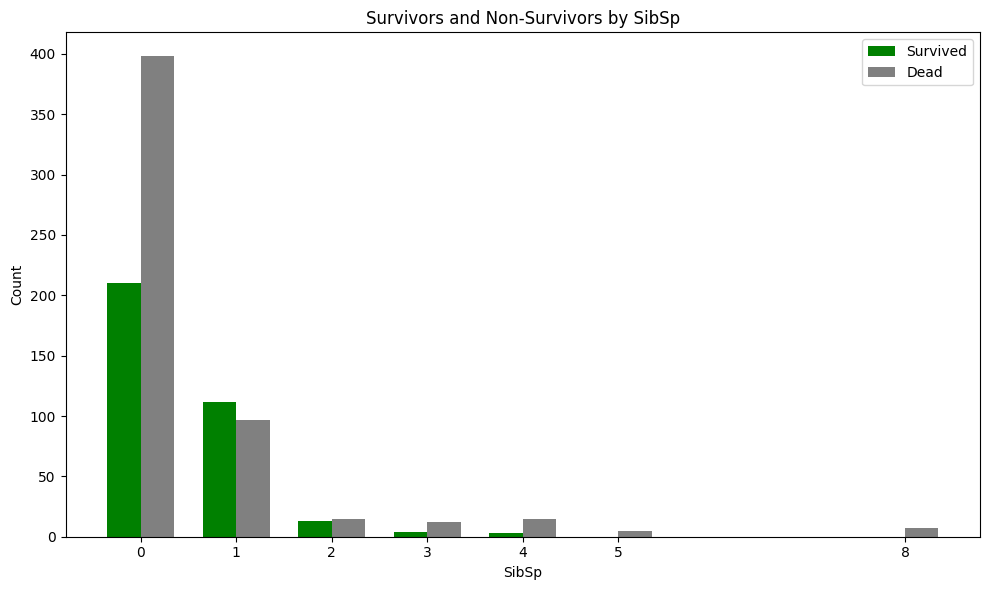

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./titanic/train.csv')

# 모든 SibSp 값들을 포함하는 데이터프레임 생성
all_sibsp = pd.DataFrame(df['SibSp'].unique(), columns=['SibSp']).sort_values('SibSp')

# 형제자매/배우자의 수(SibSp)를 기준으로 생존자와 사망자 그룹화 및 인원수 계산
survived_by_sibsp = df[df['Survived'] == 1]['SibSp'].value_counts()
dead_by_sibsp = df[df['Survived'] == 0]['SibSp'].value_counts()

# 모든 SibSp 값들에 대해 생존자와 사망자 수 계산
all_sibsp['Survived'] = all_sibsp['SibSp'].apply(lambda x: survived_by_sibsp[x] if x in survived_by_sibsp else 0)
all_sibsp['Dead'] = all_sibsp['SibSp'].apply(lambda x: dead_by_sibsp[x] if x in dead_by_sibsp else 0)

# 그래프 그리기
plt.figure(figsize=(10, 6))

x = all_sibsp['SibSp']
width = 0.35

plt.bar(x - width/2, all_sibsp['Survived'], width, label='Survived', color='green')
plt.bar(x + width/2, all_sibsp['Dead'], width, label='Dead', color='gray')

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survivors and Non-Survivors by SibSp')
plt.xticks(x, x.tolist())
plt.legend()

plt.tight_layout()
plt.show()